In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

In [2]:
#Load the model
model = InceptionV3()

In [3]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

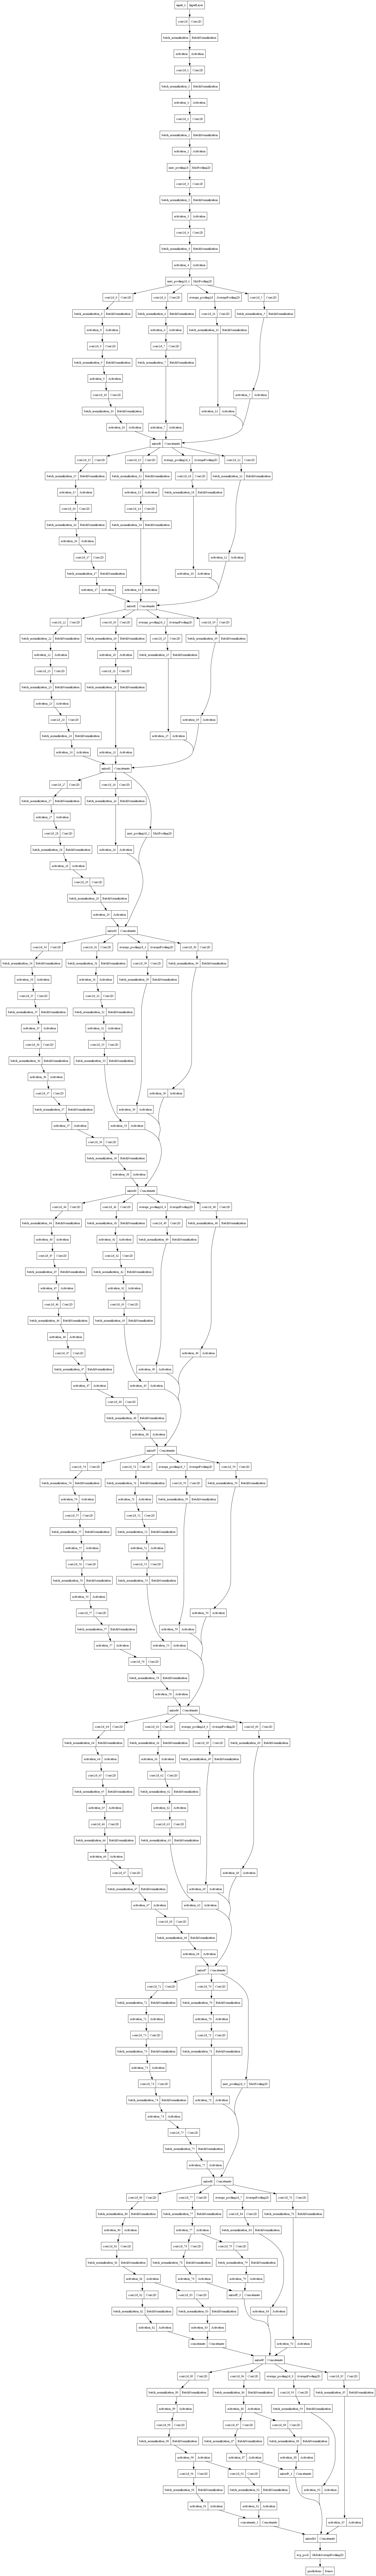

In [4]:
from keras.utils import plot_model
plot_model(model)

In [15]:
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Specify the desired input shape for InceptionV3
input_shape = (299, 299, 3)

# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional base, unfreeze the last few layers
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Create a new model with additional dense layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [16]:
# Print the list of trainable and non-trainable layers
print("Trainable Layers:")
for layer in base_model.layers:
    if layer.trainable:
        print(layer.name)

print("\nNon-Trainable Layers:")
for layer in base_model.layers:
    if not layer.trainable:
        print(layer.name)

Trainable Layers:
conv2d_741
average_pooling2d_70
conv2d_734
batch_normalization_736
batch_normalization_737
batch_normalization_740
batch_normalization_741
conv2d_742
batch_normalization_734
activation_736
activation_737
activation_740
activation_741
batch_normalization_742
activation_734
mixed9_0
concatenate_14
activation_742
mixed9
conv2d_747
batch_normalization_747
activation_747
conv2d_744
conv2d_748
batch_normalization_744
batch_normalization_748
activation_744
activation_748
conv2d_745
conv2d_746
conv2d_749
conv2d_750
average_pooling2d_71
conv2d_743
batch_normalization_745
batch_normalization_746
batch_normalization_749
batch_normalization_750
conv2d_751
batch_normalization_743
activation_745
activation_746
activation_749
activation_750
batch_normalization_751
activation_743
mixed9_1
concatenate_15
activation_751
mixed10

Non-Trainable Layers:
input_8
conv2d_658
batch_normalization_658
activation_658
conv2d_659
batch_normalization_659
activation_659
conv2d_660
batch_normalizatio

In [18]:
from collections import Counter

# ... (Your existing code to create and modify the model)

# Create a counter to count the occurrences of different types of layers
trainable_layer_types = Counter([layer.name.split('_')[0] for layer in base_model.layers if layer.trainable])

# Print the count of different types of trainable layers
print("Count of Different Types of Trainable Layers:")
for layer_type, count in trainable_layer_types.items():
    print(f"{layer_type}: {count}")


Count of Different Types of Trainable Layers:
conv2d: 12
average: 2
batch: 15
activation: 15
mixed9: 3
concatenate: 2
mixed10: 1
